In [73]:
# importing The necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [74]:
# Train Data
big_data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
big_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [75]:
# Checking the null values in the dataset.
big_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [76]:
# Test Data
bigm_data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')
bigm_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [77]:
# Checking the no. of rows and columns of train dataset
big_data.shape

(8523, 12)

In [78]:
# Checking the no. of rows and columns of test dataset
bigm_data.shape

(5681, 11)

In [79]:
# Checking the total columns of train dataset.
big_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [80]:
# Checking the data summary.
big_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [82]:
# Checking the statistical summary.
big_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


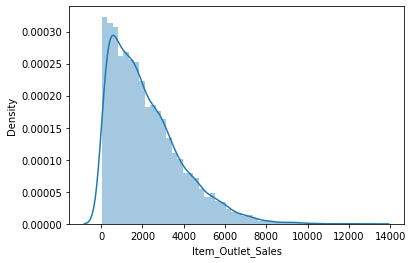

In [83]:
# Exploratory Data Analysis.

import warnings
warnings.filterwarnings('ignore')

# Visualizing the 'Item_Outlet_Sales' Column using distribution plot.
sns.distplot(big_data['Item_Outlet_Sales'])

In [85]:
# Checking the total value counts of Item_Identifier column.

id_counts = big_data['Item_Identifier'].value_counts()
id_counts.head()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
Name: Item_Identifier, dtype: int64

In [86]:
# Checking the total value counts of Item_Fat_Content column.

big_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

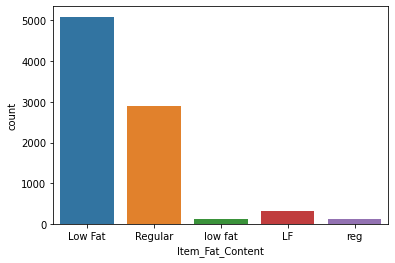

In [87]:
# Visualizing 'Iten_Fat_Content' column using countplot.
sns.countplot(big_data.Item_Fat_Content)

In [88]:
# Checking the total counts of coumn 'Item_Type'
big_data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

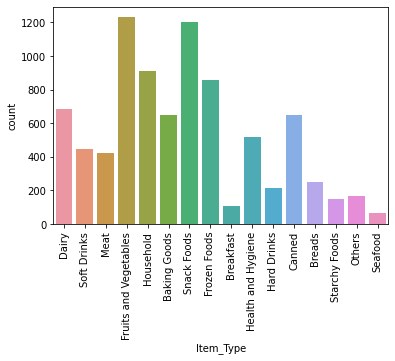

In [89]:
# Visualing the 'Item_type' column.
sns.countplot(big_data.Item_Type)
plt.xticks(rotation=90)

In [90]:
# Checking Item_type and Fat_counts combinely.
Item_Type_and_fat_counts = big_data.groupby(["Item_Fat_Content","Item_Type"]).size()
print(Item_Type_and_fat_counts)

Item_Fat_Content  Item_Type            
LF                Baking Goods             20
                  Breads                    8
                  Breakfast                 2
                  Canned                   17
                  Dairy                    24
                                           ..
reg               Fruits and Vegetables    25
                  Meat                      7
                  Snack Foods              23
                  Soft Drinks               1
                  Starchy Foods             7
Length: 70, dtype: int64


In [91]:
# Checking the total value counts of Outlet_Identifier column.
outlet_id_counts = big_data['Outlet_Identifier'].value_counts()
outlet_id_counts

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [92]:
big_data['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

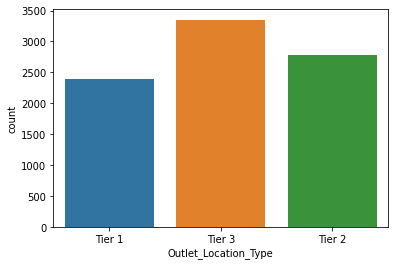

In [93]:
# Visualizing the Outlet_Location_Type column.
sns.countplot(big_data.Outlet_Location_Type)

In [94]:
# Checking the total count of Outlet_Size column.
big_data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [95]:
# Checking the total value counts of column Outlet_Type column.
big_data['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

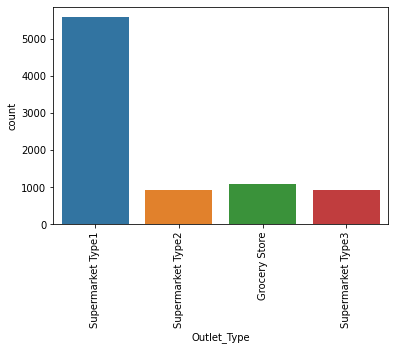

In [96]:
# Visualizing the Outlet_Type column.
sns.countplot(big_data.Outlet_Type)
plt.xticks(rotation=90)

In [97]:
# Checking the Outlet_Location_Type_counts regarding Outlet_Identifier and Outlet_Type column.
Outlet_Location_Type_counts = big_data.groupby(["Outlet_Location_Type","Outlet_Identifier","Outlet_Type"]).size()
print(Outlet_Location_Type_counts)

Outlet_Location_Type  Outlet_Identifier  Outlet_Type      
Tier 1                OUT019             Grocery Store        528
                      OUT046             Supermarket Type1    930
                      OUT049             Supermarket Type1    930
Tier 2                OUT017             Supermarket Type1    926
                      OUT035             Supermarket Type1    930
                      OUT045             Supermarket Type1    929
Tier 3                OUT010             Grocery Store        555
                      OUT013             Supermarket Type1    932
                      OUT018             Supermarket Type2    928
                      OUT027             Supermarket Type3    935
dtype: int64


In [98]:
# Checking the total value counts of Outlet_Location_Type column.
Outlet_Location_Type_counts = big_data.groupby(["Outlet_Type","Outlet_Size"]).size()
print(Outlet_Location_Type_counts)

Outlet_Type        Outlet_Size
Grocery Store      Small           528
Supermarket Type1  High            932
                   Medium          930
                   Small          1860
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
dtype: int64


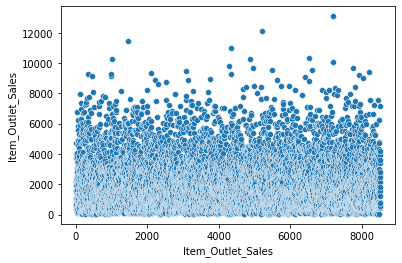

In [99]:
# Visualizing the Item_Outlet_Sales column using scatterplot.
import seaborn as sns
sns.scatterplot(data = big_data['Item_Outlet_Sales'])
plt.xlabel('Item_Outlet_Sales')
plt.show()

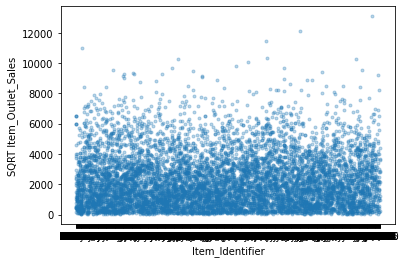

In [100]:
# Item_Identifier vs Item_Outlet_Sales Analysis

plt.xlabel("Item_Identifier")
plt.ylabel("SQRT Item_Outlet_Sales")
plt.plot(big_data.Item_Identifier , big_data["Item_Outlet_Sales"],'.', alpha = 0.3)

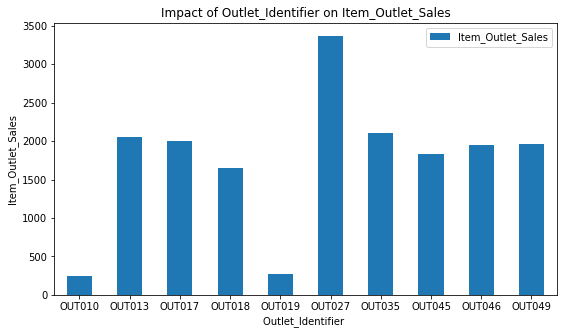

In [101]:
#  Outlet_Identifier vs Item_Outlet_Sales.
Outlet_Identifier_pivot = \
big_data.pivot_table(index='Outlet_Identifier', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Identifier_pivot.plot(kind='bar',figsize=(9,5))
plt.xlabel("Outlet_Identifier ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Identifier on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

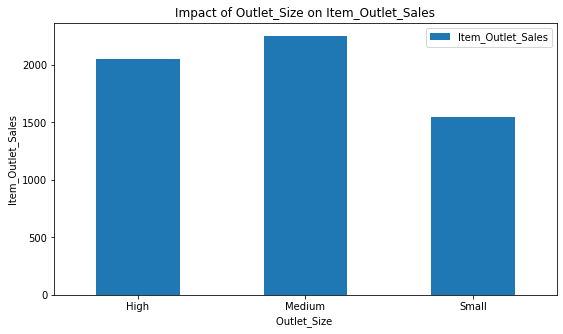

In [102]:
# Outlet_Size vs Item_Outlet_Sales.
Outlet_Size_pivot = \
big_data.pivot_table(index='Outlet_Size', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Size_pivot.plot(kind='bar',figsize=(9,5))
plt.xlabel("Outlet_Size ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

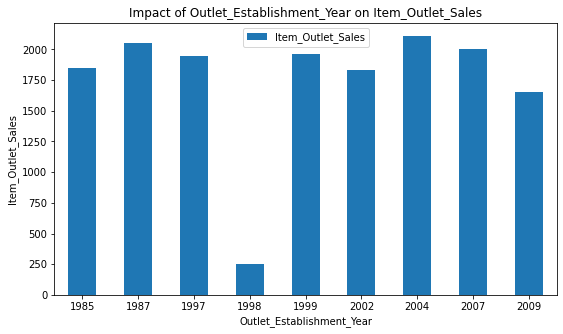

In [103]:
# Outlet_Establishment_Year vs Item_Outlet_Sales
Outlet_Establishment_Year_pivot = \
big_data.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Establishment_Year_pivot.plot(kind='bar',figsize=(9,5))
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()


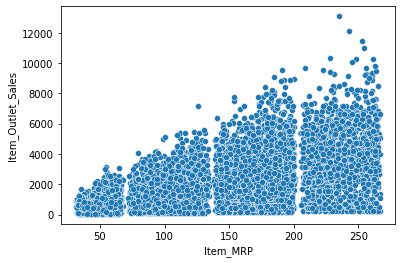

In [104]:
# Item_MRP vs Item_Outlet_Sales.
sns.scatterplot(x = big_data['Item_MRP'], y = big_data['Item_Outlet_Sales'])
#plt.xlabel('Item_MRP')
#lt.ylabel('Item_Outlet_Sales')
plt.show()

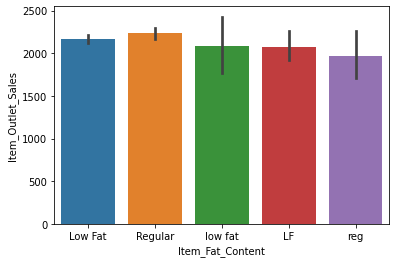

In [105]:
# Visualizing Item_Fat_Content vs Item_Outlet_Sales using bar plot.
sns.barplot(x = big_data['Item_Fat_Content'],y = big_data['Item_Outlet_Sales'])

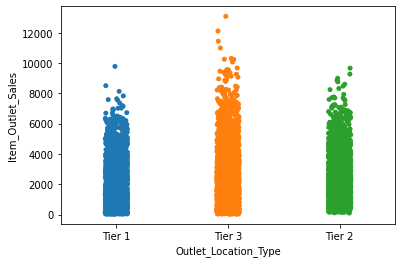

In [106]:
# Visualizing the Outlet_Location_Type vs Item_Outlet_Sales using strip plot.
sns.stripplot(x = big_data['Outlet_Location_Type'],y = big_data['Item_Outlet_Sales'])

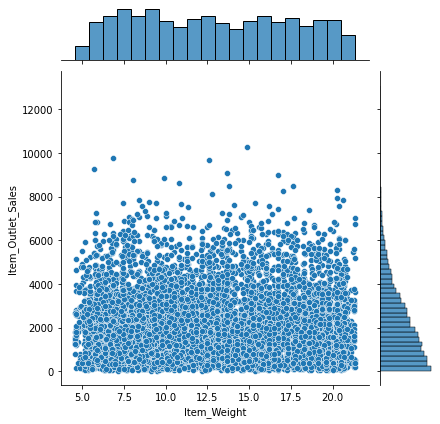

In [107]:
# Visualizing Item_Weight vs Item_Outlet_Sales using the jointplot.
sns.jointplot(x = big_data['Item_Weight'],y = big_data['Item_Outlet_Sales'])

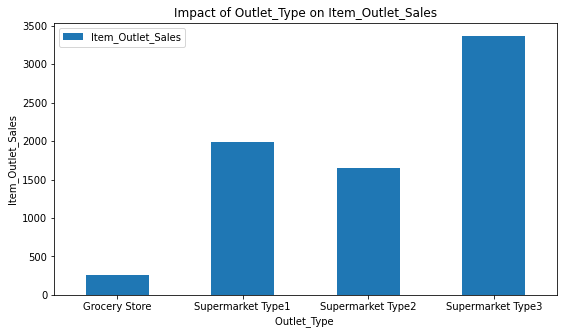

In [108]:
# Outlet_Type vs Item_Outlet_Sales.
Outlet_Type_pivot = \
big_data.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Type_pivot.plot(kind='bar',figsize=(9,5))
plt.xlabel("Outlet_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

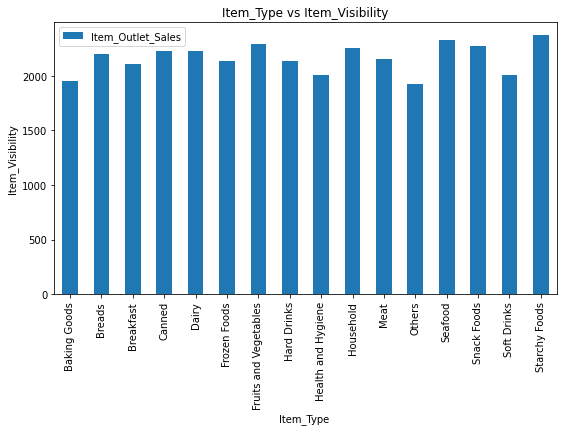

In [109]:
# Item_Type vs Item_Visibility.

pivoTable = \
big_data.pivot_table(index='Item_Type', values="Item_Outlet_Sales", aggfunc=np.mean)

pivoTable.plot(kind='bar',figsize=(9,5))
plt.xlabel("Item_Type ")
plt.ylabel("Item_Visibility")
plt.title("Item_Type vs Item_Visibility")
plt.xticks(rotation=90)
plt.show()

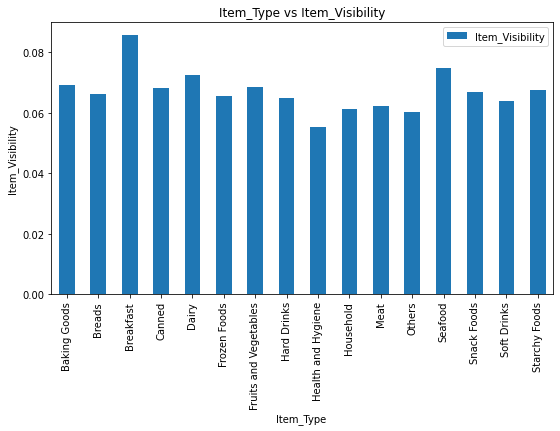

In [110]:
# Item_Type vs Item_Visibility.

pivoTable = \
big_data.pivot_table(index='Item_Type', values="Item_Visibility", aggfunc=np.mean)

pivoTable.plot(kind='bar',figsize=(9,5))
plt.xlabel("Item_Type ")
plt.ylabel("Item_Visibility")
plt.title("Item_Type vs Item_Visibility")
plt.xticks(rotation=90)
plt.show()

In [111]:
# Handling the missing data using mean and mode imputation techniques.
big_data['Item_Weight'].fillna(big_data['Item_Weight'].mean(),inplace=True)

In [112]:
big_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [113]:
mode_outlet_size=big_data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))

In [114]:
print(mode_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [128]:
missing_values=big_data['Outlet_Size'].isnull()

In [129]:
print(missing_values)

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [130]:
big_data.loc[missing_values,'Outlet_Size']=big_data.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_outlet_size)

In [131]:
big_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [115]:
# checking the correlation between each variable of dataset.
big_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


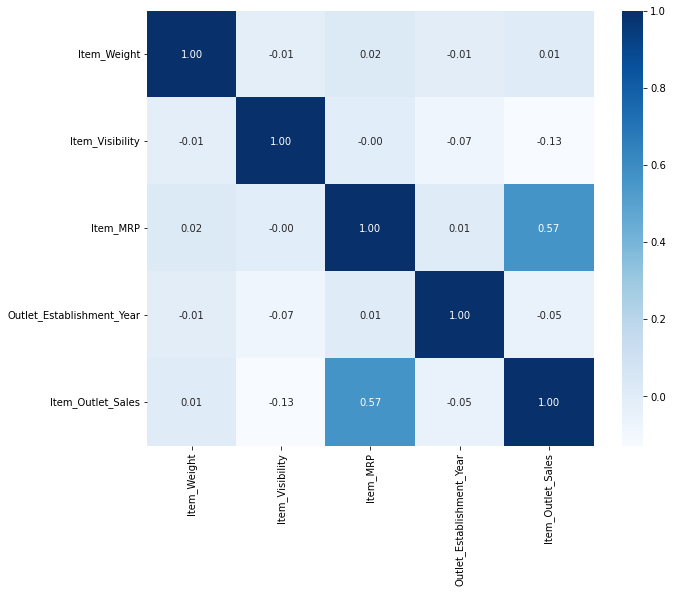

In [116]:
plt.figure(figsize=(10,8))
sns.heatmap(big_data.corr(),annot=True,cmap='Blues',fmt='0.2f')

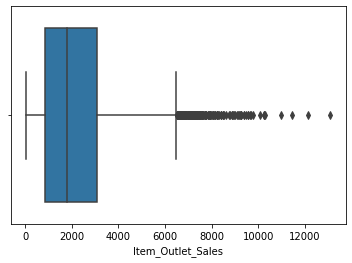

In [45]:
# Checking the outliers using boxplot.
sns.boxplot(big_data['Item_Outlet_Sales'])
plt.show()

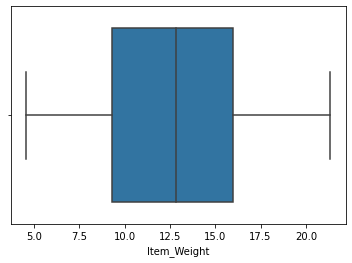

In [46]:
sns.boxplot(big_data['Item_Weight'])
plt.show()

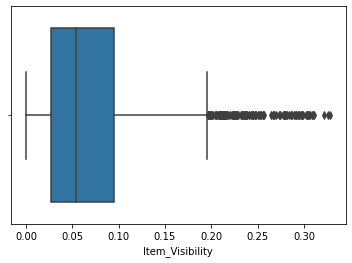

In [47]:
sns.boxplot(big_data['Item_Visibility'])
plt.show()

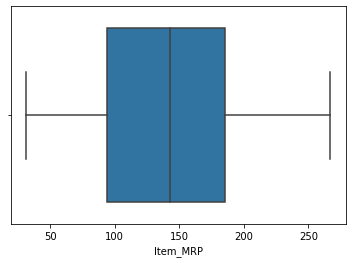

In [48]:
sns.boxplot(big_data['Item_MRP'])
plt.show()

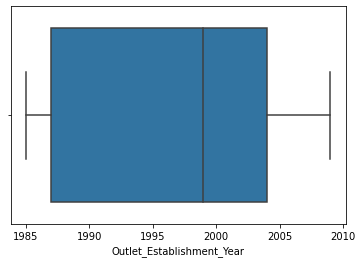

In [49]:
sns.boxplot(big_data['Outlet_Establishment_Year'])
plt.show()

In [117]:
big_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [118]:
big_data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [119]:
big_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [120]:
# Encoding the categorical columns using label encoder.
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [121]:
big_data['Item_Identifier']=encoder.fit_transform(big_data['Item_Identifier'])

In [122]:
big_data['Item_Fat_Content']=encoder.fit_transform(big_data['Item_Fat_Content'])

In [123]:
big_data['Item_Type']=encoder.fit_transform(big_data['Item_Type'])

In [124]:
big_data['Outlet_Identifier']=encoder.fit_transform(big_data['Outlet_Identifier'])

In [132]:
big_data['Outlet_Location_Type']=encoder.fit_transform(big_data['Outlet_Location_Type'])

In [133]:
big_data['Outlet_Type']=encoder.fit_transform(big_data['Outlet_Type'])

In [134]:
big_data['Outlet_Size']=encoder.fit_transform(big_data['Outlet_Size'])

In [135]:
big_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,3,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [136]:
# Spliting the data into features and labels.
x=big_data.drop('Item_Outlet_Sales', axis=1)
y=big_data['Item_Outlet_Sales']

In [137]:
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,1,0.000000,6,182.0950,0,1998,3,2,0
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,1,0.046982,0,108.1570,7,2002,3,1,1
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2


In [138]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [139]:
# Checking skewness
x.skew().sort_values(ascending=False)

Item_Visibility              1.167091
Outlet_Type                  0.927438
Item_Fat_Content             0.616705
Item_MRP                     0.127202
Item_Type                    0.101655
Item_Weight                  0.090561
Item_Identifier             -0.008877
Outlet_Identifier           -0.059861
Outlet_Size                 -0.131895
Outlet_Location_Type        -0.209093
Outlet_Establishment_Year   -0.396641
dtype: float64

In [ ]:
# There is no skewness in the dataset.

In [140]:
# Spliting the data in Train and Test.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [141]:
# Model Building.
from xgboost import XGBRegressor

In [142]:
regressor=XGBRegressor()

In [143]:
# Model Evaluation
regressor.fit(x_train,y_train)

[08:12:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [144]:
# Model Prediction
y_pred=regressor.predict(x_train)

In [146]:
from sklearn import metrics

In [147]:
# Accuracy check using r2 score
r2_train=metrics.r2_score(y_train,y_pred)

In [148]:
print('R2 score:',r2_train)

R2 score: 0.636453076528823


In [149]:
y_pred_test=regressor.predict(x_test)

In [150]:
r2_test=metrics.r2_score(y_test,y_pred_test)

In [151]:
print('R2 score:',r2_test)

R2 score: 0.5874652972697701


In [153]:
# Let's check the cross validation score.
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
cvs=cross_val_score(regressor,x,y,cv=8)
print('Cross_validation_score for XGBRegressor is:',cvs.mean())


[08:23:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:23:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:23:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:23:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:23:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:23:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:23:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:23:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [154]:
cvs

array([0.60386768, 0.59760214, 0.58694829, 0.55564434, 0.60330836,
       0.62692993, 0.60474058, 0.59167703])

In [168]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [169]:
lasso=LassoCV(alphas=None,max_iter=100,normalize=True)
lasso.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [170]:
# Best alpha Parameters.
alpha=lasso.alpha_
alpha

0.09473129252849474

In [171]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.09473129252849474)

In [172]:
lasso_reg.score(x_test,y_test)

0.49836109244648497

In [173]:
# Ridge Regularization.
ridge=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)

In [174]:
ridge.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [175]:
ridge.alpha_

0.001

In [176]:
# Best alpha parameter.

ridge_model=Ridge(alpha=ridge.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [177]:
ridge_model.score(x_test,y_test)

0.4983531163165523

# We got the same r2 score for Ridge and Lasso Regression so we can say that the model is not overfitting.

In [178]:
# Saving the model in the pickle format.
import pickle
filename='Bigmart_data.pickle'
pickle.dump(regressor,open(filename,'wb'))